In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#coment after moving the imports to /src/methods.py

from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2, f_classif, mutual_info_classif, f_classif
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import sklearn

from scipy.stats import ttest_ind
import scipy

from xgboost import XGBClassifier
import xgboost

 
sys.path.insert(1, '../src')
import methods as mt


In [2]:
# Check the version of th eused libraries

print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
#print(sklearn.__version__)
#print(scipy.__version__)
#print(xgboost.__version__)

1.26.4
2.2.2
3.9.2
0.13.2


In [3]:
asthma_disease_cleaned_df = pd.read_csv("../data/asthma_disease_data_cleaned.csv")

In [4]:
asthma_disease_cleaned_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,BMI_Category,FEV1_FVC_Ratio,SymptomSeverity,AllergyScore,TotalExposure
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,1,0,0,1,0,Underweight,0.277068,2,1,11.218398
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,1,1,1,0,Normal,1.290987,4,1,16.012134
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1,0,1,1,0,Underweight,0.338077,5,2,8.354581
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,1,1,1,0,0,Obese,1.318186,4,1,12.119066
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,1,0,0,1,0,Normal,1.131243,4,1,12.291287


In [5]:
asthma_disease_cleaned_df.drop(['BMI_Category'], axis=1, inplace=True)
asthma_disease_cleaned_df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,FEV1_FVC_Ratio,SymptomSeverity,AllergyScore,TotalExposure
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1,0,0,1,0,0.277068,2,1,11.218398
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,0,1,1,1,0,1.290987,4,1,16.012134
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1,1,0,1,1,0,0.338077,5,2,8.354581
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,1,1,1,0,0,1.318186,4,1,12.119066
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,1,1,0,0,1,0,1.131243,4,1,12.291287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,1,0,0,0,1,1,0.604961,2,2,13.223856
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,...,0,0,1,1,0,1,0.205641,2,1,16.480757
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,...,0,1,1,0,1,1,0.503742,4,1,15.333999
2390,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,...,1,1,0,1,1,0,2.032104,4,1,22.212851


In [6]:
TARGET = "Diagnosis"
RANDOM_STATE = 42

# Get all columns except 'Diagnosis'
FEATURES = [col for col in asthma_disease_cleaned_df.columns if col != 'Diagnosis' and col != 'BMI_Category']
TARGET = 'Diagnosis'

In [7]:
X = asthma_disease_cleaned_df[FEATURES]
y = asthma_disease_cleaned_df[TARGET]

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

## Feature Selection
### Method 1: Feature Importance using RandomForest

In [9]:
forest = RandomForestClassifier(random_state = RANDOM_STATE)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
np.array(FEATURES)[indices]

array(['PollutionExposure', 'TotalExposure', 'DustExposure',
       'LungFunctionFVC', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FEV1_FVC_Ratio', 'BMI', 'LungFunctionFEV1',
       'PollenExposure', 'Age', 'SymptomSeverity', 'Ethnicity',
       'AllergyScore', 'EducationLevel', 'NighttimeSymptoms',
       'ShortnessOfBreath', 'FamilyHistoryAsthma', 'Coughing', 'Gender',
       'Wheezing', 'ChestTightness', 'ExerciseInduced',
       'GastroesophagealReflux', 'HistoryOfAllergies', 'HayFever',
       'Smoking', 'PetAllergy', 'Eczema'], dtype='<U22')

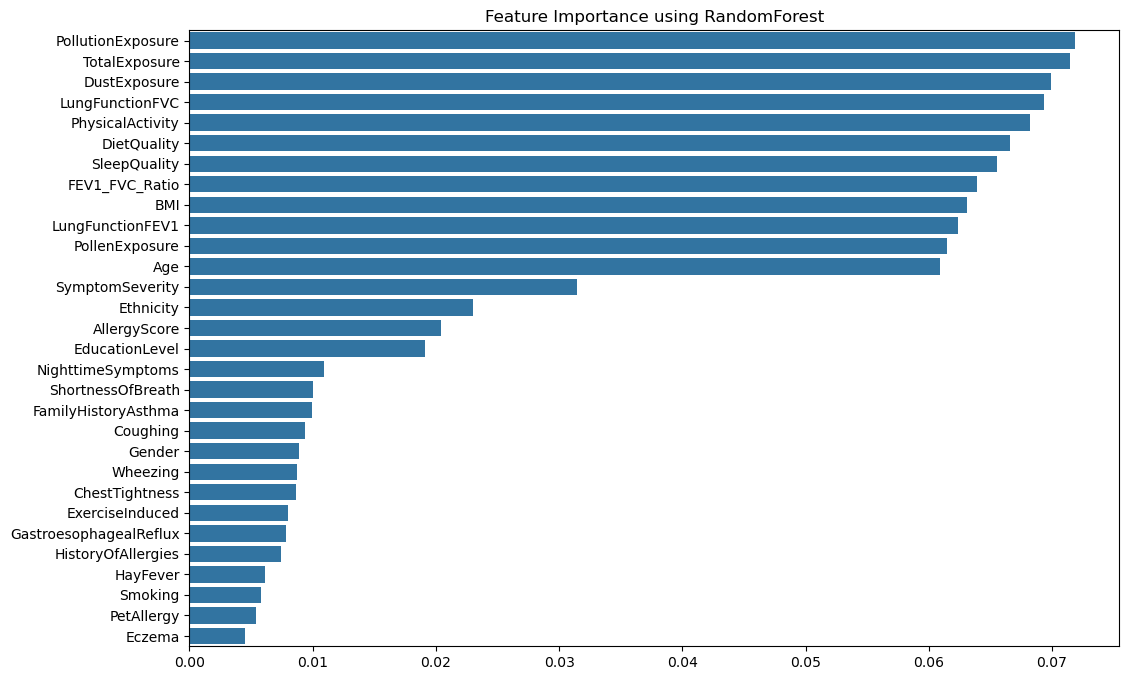

In [11]:
plt.figure(figsize = (12, 8))

sns.barplot(x = importances[indices], y = np.array(FEATURES)[indices])

plt.title("Feature Importance using RandomForest")
plt.show()

In [12]:
# Moved the function get_feature_importance in /src/methods.py

In [13]:
mt.get_feature_importance(X_train, y_train, FEATURES)

array(['PollutionExposure', 'TotalExposure', 'DustExposure',
       'LungFunctionFVC', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FEV1_FVC_Ratio', 'BMI', 'LungFunctionFEV1',
       'PollenExposure', 'Age', 'SymptomSeverity', 'Ethnicity',
       'AllergyScore', 'EducationLevel', 'NighttimeSymptoms',
       'ShortnessOfBreath', 'FamilyHistoryAsthma', 'Coughing', 'Gender',
       'Wheezing', 'ChestTightness', 'ExerciseInduced',
       'GastroesophagealReflux', 'HistoryOfAllergies', 'HayFever',
       'Smoking', 'PetAllergy', 'Eczema'], dtype='<U22')

## Method 2: Univariate Selection (SelectKBest)

In [14]:
 # select top 10 features for k
select_kbest = SelectKBest(score_func = f_classif, k = 10) 
select_kbest.fit(X_train, y_train)

SelectKBest()

In [15]:
selected_features_kbest = select_kbest.get_support(indices = True)
print("Selected Features using SelectKBest:", X.columns[selected_features_kbest])

Selected Features using SelectKBest: Index(['Age', 'Gender', 'Ethnicity', 'DustExposure', 'HayFever',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ExerciseInduced',
       'AllergyScore'],
      dtype='object')


In [16]:
# Moved the function get_feature_importance in /src/methods.py

In [17]:
mt.get_top_features(X_train, y_train)

['Age',
 'Gender',
 'Ethnicity',
 'DustExposure',
 'HayFever',
 'LungFunctionFEV1',
 'LungFunctionFVC',
 'Wheezing',
 'ExerciseInduced',
 'AllergyScore']

### Method 3: Feature Importance using XGBoost

In [18]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [19]:
xgb_importances = xgb.feature_importances_
indices_xgb = np.argsort(xgb_importances)[::-1]

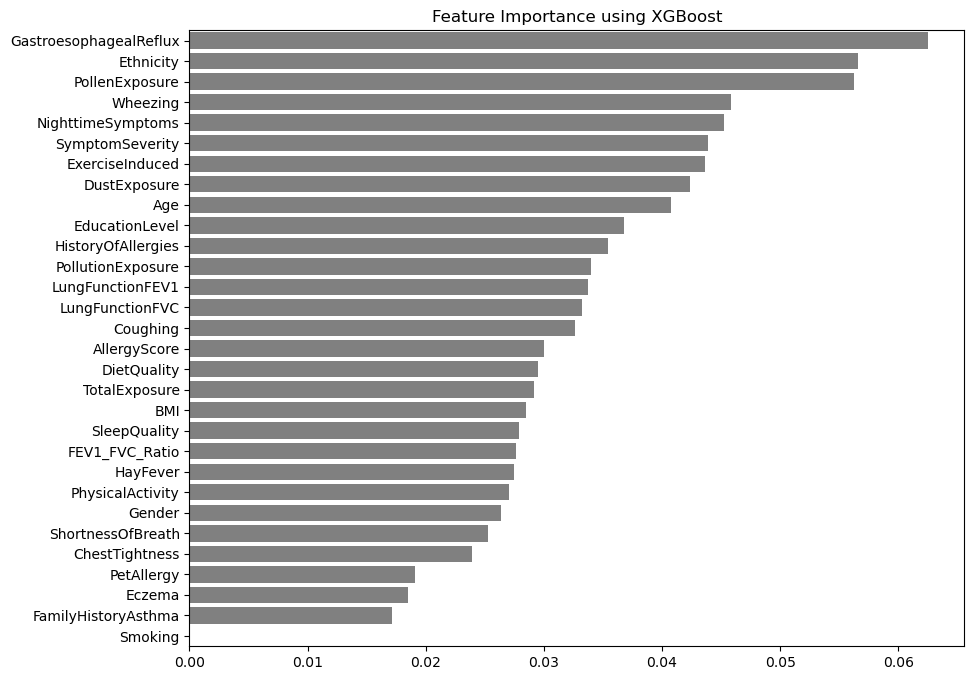

In [20]:
plt.figure(figsize = (10, 8))
sns.barplot(x = xgb_importances[indices_xgb], y = np.array(FEATURES)[indices_xgb], color='grey')

plt.title("Feature Importance using XGBoost")
plt.show()

In [21]:
# Moved the function get_feature_importance in /src/methods.py

In [22]:
mt.get_feature_importances_xgb(X_train, y_train, FEATURES)

['GastroesophagealReflux',
 'Ethnicity',
 'PollenExposure',
 'Wheezing',
 'NighttimeSymptoms',
 'SymptomSeverity',
 'ExerciseInduced',
 'DustExposure',
 'Age',
 'EducationLevel',
 'HistoryOfAllergies',
 'PollutionExposure',
 'LungFunctionFEV1',
 'LungFunctionFVC',
 'Coughing',
 'AllergyScore',
 'DietQuality',
 'TotalExposure',
 'BMI',
 'SleepQuality',
 'FEV1_FVC_Ratio',
 'HayFever',
 'PhysicalActivity',
 'Gender',
 'ShortnessOfBreath',
 'ChestTightness',
 'PetAllergy',
 'Eczema',
 'FamilyHistoryAsthma',
 'Smoking']

### Method 4: Recursive Feature Elimination (RFE) with Logistic Regression

In [23]:
logreg = LogisticRegression(max_iter = 1000, random_state = RANDOM_STATE)
rfe = RFE(logreg, n_features_to_select = 10)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=10)

###  Feature Testing and Validation

In [24]:
 categorical_features = ["Gender", 
                        "Ethnicity", 
                        "EducationLevel", 
                        "PetAllergy", 
                        "FamilyHistoryAsthma",
                        "HistoryOfAllergies", 
                        "Eczema", 
                        "HayFever",
                        "GastroesophagealReflux",
                        "Wheezing", 
                        "ShortnessOfBreath", 
                        "ChestTightness", 
                        "Coughing",
                        "NighttimeSymptoms", 
                        "ExerciseInduced", 
                       ]

continuous_features = ["Age", 
                       "BMI", 
                       "Smoking", 
                       "PhysicalActivity", 
                       "DietQuality", 
                       "SleepQuality",
                       "PollutionExposure", 
                       "PollenExposure", 
                       "DustExposure", 
                       "LungFunctionFEV1", 
                       "LungFunctionFVC",
                      ]

In [25]:
len(categorical_features)

15

In [26]:
len(continuous_features)

11

#### Chi-Square Test for Categorical Features

In [27]:
X_categorical = X[categorical_features]

# Perform Chi-square test
chi2_scores, p_values = chi2(X_categorical, y)
chi2_results = pd.DataFrame({"Feature": categorical_features, "Chi2 Score": chi2_scores, "p-value": p_values})

print("Chi-Square Test Results:\n", chi2_results)

Chi-Square Test Results:
                    Feature  Chi2 Score   p-value
0                   Gender    0.011861  0.913274
1                Ethnicity    1.018004  0.312993
2           EducationLevel    0.098858  0.753204
3               PetAllergy    0.341190  0.559143
4      FamilyHistoryAsthma    0.002974  0.956510
5       HistoryOfAllergies    0.005469  0.941046
6                   Eczema    0.142706  0.705606
7                 HayFever    0.654320  0.418572
8   GastroesophagealReflux    1.044227  0.306840
9                 Wheezing    0.714541  0.397940
10       ShortnessOfBreath    0.279041  0.597331
11          ChestTightness    1.832846  0.175792
12                Coughing    0.695322  0.404360
13       NighttimeSymptoms    0.458823  0.498175
14         ExerciseInduced    2.751177  0.097183


In [28]:
# Moved the function get_feature_importance in /src/methods.py

In [29]:
mt.execute_chi2_test(X_categorical, y, categorical_features)

,Feature,Chi2 Score,p-value
0,Gender,0.011861,0.913274
1,Ethnicity,1.018004,0.312993
2,EducationLevel,0.098858,0.753204
3,PetAllergy,0.341190,0.559143
4,FamilyHistoryAsthma,0.002974,0.956510
5,HistoryOfAllergies,0.005469,0.941046
6,Eczema,0.142706,0.705606
7,HayFever,0.654320,0.418572
8,GastroesophagealReflux,1.044227,0.306840
9,Wheezing,0.714541,0.397940


#### ANOVA F-Test for Continuous Features

In [30]:
X_continuous = X[continuous_features]

f_scores, p_values = f_classif(X_continuous, y)
anova_results = pd.DataFrame({"Feature": continuous_features, "F-Score": f_scores, "p-value": p_values})

print("ANOVA F-Test Results:\n", anova_results)

ANOVA F-Test Results:
               Feature   F-Score   p-value
0                 Age  0.545844  0.460094
1                 BMI  0.374821  0.540446
2             Smoking  0.892556  0.344881
3    PhysicalActivity  0.061335  0.804420
4         DietQuality  0.023700  0.877664
5        SleepQuality  0.776520  0.378296
6   PollutionExposure  0.049158  0.824553
7      PollenExposure  0.544963  0.460456
8        DustExposure  1.613295  0.204153
9    LungFunctionFEV1  1.302200  0.253926
10    LungFunctionFVC  2.099965  0.147434


In [31]:
# Moved the function get_feature_importance in /src/methods.py

In [32]:
mt.execute_anova_test(X_continuous, y, continuous_features)

,Feature,F-Score,p-value
0,Age,0.545844,0.460094
1,BMI,0.374821,0.540446
2,Smoking,0.892556,0.344881
3,PhysicalActivity,0.061335,0.804420
4,DietQuality,0.023700,0.877664
5,SleepQuality,0.776520,0.378296
6,PollutionExposure,0.049158,0.824553
7,PollenExposure,0.544963,0.460456
8,DustExposure,1.613295,0.204153
9,LungFunctionFEV1,1.302200,0.253926


#### T-Test for Binary Classification and Continuous Features

In [33]:
# Try a test without to use a python function
t_test_results = {}

for feature in continuous_features:
    group1 = X_continuous[y == 0][feature]
    group2 = X_continuous[y == 1][feature]
    t_stat, p_value = ttest_ind(group1, group2)
    
    t_test_results[feature] = {"T-Statistic": t_stat, "p-value": p_value}

t_test_results_df = pd.DataFrame(t_test_results).T

print("T-Test Results for Continuous Features:\n", t_test_results_df)

T-Test Results for Continuous Features:
                    T-Statistic   p-value
Age                   0.738812  0.460094
BMI                   0.612226  0.540446
Smoking               0.944752  0.344881
PhysicalActivity     -0.247659  0.804420
DietQuality           0.153947  0.877664
SleepQuality         -0.881204  0.378296
PollutionExposure     0.221717  0.824553
PollenExposure       -0.738216  0.460456
DustExposure          1.270155  0.204153
LungFunctionFEV1     -1.141140  0.253926
LungFunctionFVC      -1.449126  0.147434


In [34]:
# Moved the function get_feature_importance in /src/methods.py

In [35]:
mt.execute_t_test(X_continuous, y, continuous_features)

,T-Statistic,p-value
Age,0.738812,0.460094
BMI,0.612226,0.540446
Smoking,0.944752,0.344881
PhysicalActivity,-0.247659,0.804420
DietQuality,0.153947,0.877664
SleepQuality,-0.881204,0.378296
PollutionExposure,0.221717,0.824553
PollenExposure,-0.738216,0.460456
DustExposure,1.270155,0.204153
LungFunctionFEV1,-1.141140,0.253926


#### Mutual Information for Categorical and Continuous Features

In [36]:
mutual_info_scores = mutual_info_classif(X, y)
mutual_info_results = pd.DataFrame({"Feature": FEATURES, "Mutual Information": mutual_info_scores})

print("Mutual Information Scores:\n", mutual_info_results)

Mutual Information Scores:
                    Feature  Mutual Information
0                      Age            0.000000
1                   Gender            0.007681
2                Ethnicity            0.000000
3           EducationLevel            0.003520
4                      BMI            0.005352
5                  Smoking            0.000000
6         PhysicalActivity            0.000000
7              DietQuality            0.001788
8             SleepQuality            0.000000
9        PollutionExposure            0.000000
10          PollenExposure            0.005240
11            DustExposure            0.000000
12              PetAllergy            0.000000
13     FamilyHistoryAsthma            0.000000
14      HistoryOfAllergies            0.000000
15                  Eczema            0.000000
16                HayFever            0.002581
17  GastroesophagealReflux            0.000000
18        LungFunctionFEV1            0.000000
19         LungFunctionFVC      

In [37]:
# Moved the function get_feature_importance in /src/methods.py

In [38]:
mutual_score_results = mt.execute_mutual_score(X, y, FEATURES)
mutual_score_results

,feature,mutual_Information
0,Age,0.000000
1,Gender,0.007534
2,Ethnicity,0.002825
3,EducationLevel,0.007159
4,BMI,0.005352
5,Smoking,0.000000
6,PhysicalActivity,0.000000
7,DietQuality,0.001788
8,SleepQuality,0.000000
9,PollutionExposure,0.000000


In [39]:
# Check if all feature values are below 0.05

feature_with_value_above_limit = []
for value in mutual_score_results.mutual_Information:
    if value >= 0.05:
        feature_with_value_above_limit.append(value)

len(feature_with_value_above_limit)

0

For the feature selection based on the mutual information for categorical and continuous features we check if their p-value is below 0.05 and we can
conclude that all features are statistically significant, becasue all values are below 0.05.

In [40]:
scaler = StandardScaler()
asthma_disease_standard_df = scaler.fit_transform(asthma_disease_cleaned_df)

In [41]:
asthma_disease_standard_df

array([[ 0.9657396 , -0.98671037,  0.33498607, ..., -1.06124834,
        -0.01230116, -0.77545918],
       [-0.74705382,  1.01346862,  1.34927301, ...,  0.55821324,
        -0.01230116,  0.1799809 ],
       [ 0.68798931, -0.98671037,  1.34927301, ...,  1.36794404,
         1.16467394, -1.34624683],
       ...,
       [ 0.54911417, -0.98671037,  2.36355994, ...,  0.55821324,
        -0.01230116,  0.04482166],
       [ 0.17878046,  1.01346862, -0.67930087, ...,  0.55821324,
        -0.01230116,  1.4158464 ],
       [-0.74705382,  1.01346862, -0.67930087, ..., -0.25151755,
        -1.18927626, -0.58578445]])

In [42]:
# Moved the function get_feature_importance in /src/methods.py

In [43]:
mt.standardize_data(asthma_disease_cleaned_df)

array([[ 0.9657396 , -0.98671037,  0.33498607, ..., -1.06124834,
        -0.01230116, -0.77545918],
       [-0.74705382,  1.01346862,  1.34927301, ...,  0.55821324,
        -0.01230116,  0.1799809 ],
       [ 0.68798931, -0.98671037,  1.34927301, ...,  1.36794404,
         1.16467394, -1.34624683],
       ...,
       [ 0.54911417, -0.98671037,  2.36355994, ...,  0.55821324,
        -0.01230116,  0.04482166],
       [ 0.17878046,  1.01346862, -0.67930087, ...,  0.55821324,
        -0.01230116,  1.4158464 ],
       [-0.74705382,  1.01346862, -0.67930087, ..., -0.25151755,
        -1.18927626, -0.58578445]])

In [44]:
# Create a Pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [45]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [47]:
pipe.score(X_test, y_test)

0.9515050167224081